In [ ]:
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
from tensorflow.keras import models, layers
import tensorflow as tf
import numpy as np

In [ ]:
(dataset_train_original, dataset_validate_original), info = tfds.load(
    'fashion_mnist',
    split=['train','test'],
    as_supervised=True,
    with_info=True
)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/60000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/fashion_mnist/3.0.1.incomplete1Z9P7Q/fashion_mnist-train.tfrecord*...:   0…

Generating test examples...:   0%|          | 0/10000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/fashion_mnist/3.0.1.incomplete1Z9P7Q/fashion_mnist-test.tfrecord*...:   0%…

Dataset fashion_mnist downloaded and prepared to /root/tensorflow_datasets/fashion_mnist/3.0.1. Subsequent calls will reuse this data.


In [ ]:
info

tfds.core.DatasetInfo(
    name='fashion_mnist',
    full_name='fashion_mnist/3.0.1',
    description="""
    Fashion-MNIST is a dataset of Zalando's article images consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes.
    """,
    homepage='https://github.com/zalandoresearch/fashion-mnist',
    data_dir=PosixGPath('/tmp/tmprfw2c0qhtfds'),
    file_format=tfrecord,
    download_size=29.45 MiB,
    dataset_size=36.42 MiB,
    features=FeaturesDict({
        'image': Image(shape=(28, 28, 1), dtype=uint8),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=10),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'test': <SplitInfo num_examples=10000, num_shards=1>,
        'train': <SplitInfo num_examples=60000, num_shards=1>,
    },
    citation="""@article{DBLP:journals/corr/abs-1708-07747,
      author    = {Han Xiao an

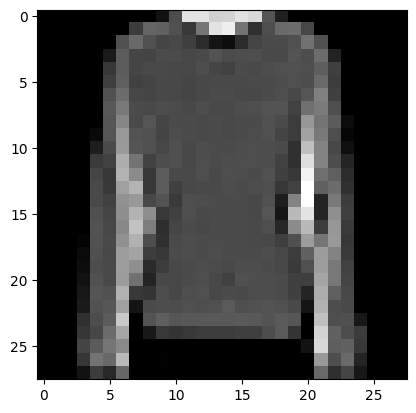

In [ ]:
for image, label in dataset_train_original.take(1):
  plt.imshow(image, cmap='gray')

In [ ]:
def encode(image, label):
  image = tf.image.convert_image_dtype(image, dtype=tf.float32) # normalization
  return image, label

dataset_train = dataset_train_original.map(lambda image, label: encode(image, label)).cache().shuffle(60_000).batch(128)
dataset_validate = dataset_validate_original.map(lambda image, label: encode(image, label)).cache().batch(128)
# shuffle not needed for validate because validation is overall average and shuffle does not have effect on that

for x, y in dataset_train.take(1):
  print(x.shape)

(128, 28, 28, 1)


In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(
    32,
    (3, 3),
    padding='valid',
    activation='relu',
    input_shape=(28, 28, 1)
))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(
    64,
    (3, 3),
    activation='relu'
))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(
    128,
    (3, 3),
    activation='relu'
))


model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.20))
model.add(layers.Flatten())
model.add(layers.Dropout(0.25))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_45 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_42 (MaxPooli  (None, 14, 14, 32)        0         
 ng2D)                                                           
                                                                 
 dropout_6 (Dropout)         (None, 14, 14, 32)        0         
                                                                 
 conv2d_46 (Conv2D)          (None, 12, 12, 64)        18496     
                                                                 
 max_pooling2d_43 (MaxPooli  (None, 6, 6, 64)          0         
 ng2D)                                                           
                                                                 
 dropout_7 (Dropout)         (None, 6, 6, 64)        

In [ ]:
from tensorflow.keras.layers import Conv2D, LeakyReLU
model = models.Sequential()

# Erster Convolutional Block
model.add(layers.Conv2D(32, (2, 2), padding='same', activation='relu', input_shape=(28, 28, 1)))
#model.add(LeakyReLU(alpha=0.01))

#model.add(layers.BatchNormalization())  # Batch Normalization Layer hinzugefügt
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.2))

# Zweiter Convolutional Block
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
#model.add(layers.BatchNormalization())  # Batch Normalization Layer hinzugefügt
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))

# Dritter Convolutional Block
model.add(layers.Conv2D(128, (2, 2), activation='relu'))
#model.add(layers.BatchNormalization())  # Batch Normalization Layer hinzugefügt
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.30))

# Global Average Pooling anstelle von Flatten
model.add(layers.Flatten())

# Dense Layer vor der Ausgabeschicht
model.add(layers.Dense(256, activation='relu'))  # Mehr Neuronen könnten hier helfen
#model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.35))

# Dense Layer vor der Ausgabeschicht
model.add(layers.Dense(256, activation='relu'))  # Mehr Neuronen könnten hier helfen
#model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.40))
model.add(layers.Dense(128, activation='relu'))  # Mehr Neuronen könnten hier helfen
# Ausgabeschicht
model.add(layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential_36"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_91 (Conv2D)          (None, 28, 28, 32)        160       
                                                                 
 max_pooling2d_87 (MaxPooli  (None, 14, 14, 32)        0         
 ng2D)                                                           
                                                                 
 dropout_79 (Dropout)        (None, 14, 14, 32)        0         
                                                                 
 conv2d_92 (Conv2D)          (None, 12, 12, 64)        18496     
                                                                 
 max_pooling2d_88 (MaxPooli  (None, 6, 6, 64)          0         
 ng2D)                                                           
                                                                 
 dropout_80 (Dropout)        (None, 6, 6, 64)        

In [ ]:
28*28, 26*26*8, 13*13*8, 11*11*16, 5*5*16, 3*3*32, 1*1*32

(784, 5408, 1352, 1936, 400, 288, 32)

In [ ]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=["accuracy"]
)

history = model.fit(
    dataset_train,
    validation_data=dataset_validate,
    epochs=50
)

Epoch 1/50
469/469 [==============================] - 5s 7ms/step - loss: 0.8792 - accuracy: 0.6588 - val_loss: 0.5459 - val_accuracy: 0.7822
Epoch 2/50
469/469 [==============================] - 4s 8ms/step - loss: 0.5436 - accuracy: 0.7950 - val_loss: 0.4422 - val_accuracy: 0.8249
Epoch 3/50
469/469 [==============================] - 3s 7ms/step - loss: 0.4584 - accuracy: 0.8299 - val_loss: 0.3781 - val_accuracy: 0.8613
Epoch 4/50
469/469 [==============================] - 3s 7ms/step - loss: 0.4076 - accuracy: 0.8500 - val_loss: 0.3413 - val_accuracy: 0.8769
Epoch 5/50
469/469 [==============================] - 3s 7ms/step - loss: 0.3759 - accuracy: 0.8602 - val_loss: 0.3297 - val_accuracy: 0.8814
Epoch 6/50
469/469 [==============================] - 4s 8ms/step - loss: 0.3552 - accuracy: 0.8704 - val_loss: 0.3122 - val_accuracy: 0.8849
Epoch 7/50
469/469 [==============================] - 3s 7ms/step - loss: 0.3418 - accuracy: 0.8743 - val_loss: 0.3036 - val_accuracy: 0.8864
Epoch 

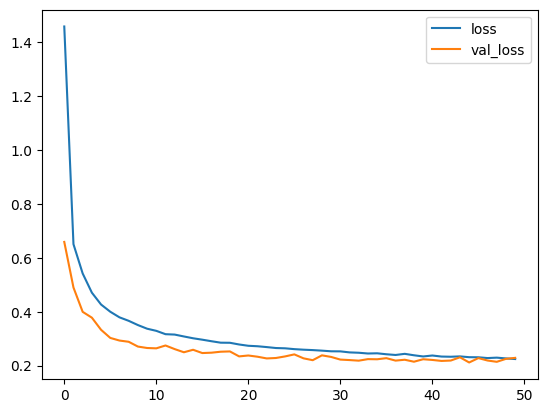

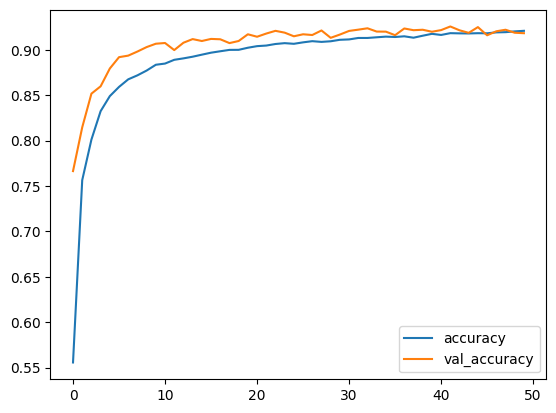

In [ ]:
def render_history(history):
    #print(history.history.keys())
    plt.plot(history.history["loss"], label="loss")
    plt.plot(history.history["val_loss"], label="val_loss")
    plt.legend()
    plt.show()

    plt.plot(history.history["accuracy"], label="accuracy")
    plt.plot(history.history["val_accuracy"], label="val_accuracy")
    plt.legend()
    plt.show()

render_history(history)